In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
import pickle

In [2]:
rent = pd.read_csv('House_Rent_Dataset.csv')

In [3]:
rent.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
rent.drop(columns=['Posted On','Floor','Area Locality','Point of Contact','Area Type'],inplace=True)

In [5]:
rent.head()

,BHK,Rent,Size,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Kolkata,Unfurnished,Bachelors,1


In [6]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   City               4746 non-null   object
 4   Furnishing Status  4746 non-null   object
 5   Tenant Preferred   4746 non-null   object
 6   Bathroom           4746 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 259.7+ KB


In [7]:
rent.shape

(4746, 7)

In [8]:
rent.dropna(inplace = True)

In [9]:
rent.shape

(4746, 7)

In [10]:
rent.isnull().sum()

BHK                  0
Rent                 0
Size                 0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
dtype: int64

# Data Preprocessing , cleaning and removing outliers

In [11]:
rent['BHK'].unique()

array([2, 1, 3, 6, 4, 5], dtype=int64)

In [12]:
rent["BHK"].value_counts()

BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: count, dtype: int64

<Axes: >

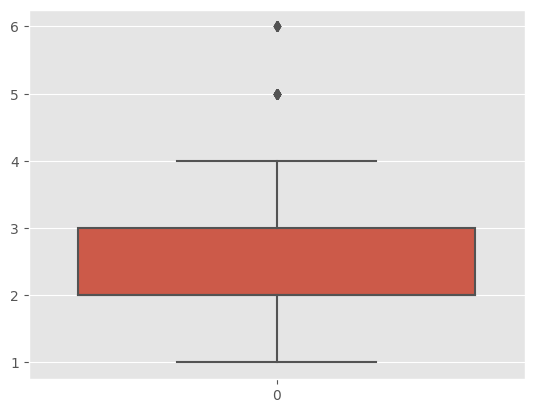

In [13]:
sns.boxplot(rent['BHK'])

In [14]:
rent['BHK'].skew()

0.5992157733648072

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8\4116623751.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rent['BHK'])


<Axes: xlabel='BHK', ylabel='Density'>

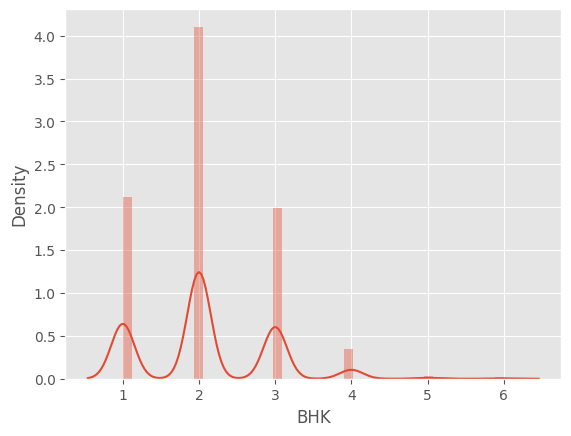

In [15]:
sns.distplot(rent['BHK'])

In [16]:
rent['BHK'].describe()

count    4746.000000
mean        2.083860
std         0.832256
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: BHK, dtype: float64

In [17]:
#finding IQR
bhk25 = rent['BHK'].quantile(0.25)
bhk75= rent['BHK'].quantile(0.75)


In [18]:
bhk25

2.0

In [19]:
bhk75

3.0

In [20]:
iqr= bhk75-bhk25

In [21]:
iqr

1.0

In [22]:
upper_limit= bhk75 + 1.5 * iqr
lower_limit= bhk25 - 1.5 * iqr

In [23]:
print("upper limit ", upper_limit)
print("lower limit" , lower_limit)

upper limit  4.5
lower limit 0.5


In [24]:
#finding outlier
rent[rent['BHK']>upper_limit]

,BHK,Rent,Size,City,Furnishing Status,Tenant Preferred,Bathroom
83,6,20000,1000,Kolkata,Semi-Furnished,Bachelors/Family,2
460,5,22500,960,Kolkata,Unfurnished,Bachelors/Family,2
521,5,25000,1880,Kolkata,Unfurnished,Bachelors,2
543,5,400000,2308,Mumbai,Furnished,Family,5
666,5,350000,1880,Mumbai,Furnished,Family,5
792,5,600000,3200,Mumbai,Semi-Furnished,Bachelors/Family,5
839,5,450000,3400,Mumbai,Semi-Furnished,Bachelors/Family,5
848,5,300000,3000,Mumbai,Furnished,Bachelors/Family,5
1023,5,500000,3900,Mumbai,Furnished,Bachelors/Family,5
1037,5,350000,3250,Mumbai,Unfurnished,Family,5


In [25]:
rent[rent['BHK']< lower_limit]

,BHK,Rent,Size,City,Furnishing Status,Tenant Preferred,Bathroom


In [26]:
new_rent=rent[rent['BHK']<upper_limit]

In [27]:
new_rent.shape

(4719, 7)

In [28]:
new_rent.head()

,BHK,Rent,Size,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Kolkata,Unfurnished,Bachelors,1


<Axes: >

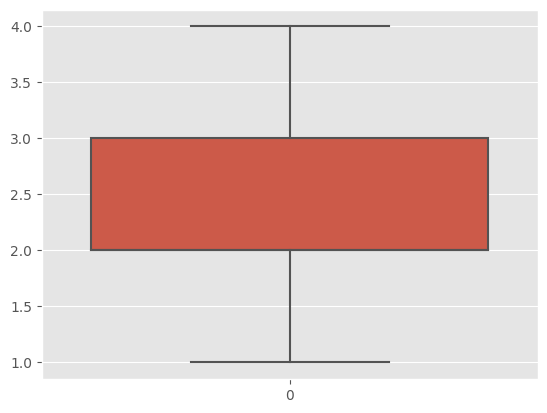

In [29]:
sns.boxplot(new_rent['BHK'])

In [30]:
rent['Rent'].unique()

array([  10000,   20000,   17000,    7500,    7000,    5000,   26000,
         25000,    6500,    5500,    8500,   40000,    6000,   11000,
          7900,    9000,    4000,    8000,    5300,   12500,   15000,
         22000,   21000,    7200,   12000,    4600,   30000,    3500,
         16000,   14500,    8200,    6700,   18000,   35000,  180000,
         14000,    3900,    6300,   13000,    6800,    4700,    4500,
         17500,    2200,    9500,   16500,   10500,   50000,    5200,
         24000,    3000,    3200,    1500,    3800,    6200,    9900,
         36125,   23000,    5146,   22500,   34000,    1800,    3700,
          3300,   60000,   65000,   45000,   70000,   75000,  160000,
        300000,  130000,   33000,   32000,   49000,   28000,   33500,
         85000,  270000,  400000,  150000,  100000,   19411,  190000,
         68000,  110000,   44000,   43000,   57000,   27000,   55000,
         95000,   80000,   89000,   38000,  350000,  170000,  210000,
         47000,  120

In [31]:
rent["Rent"].value_counts()

Rent
15000    275
10000    248
12000    238
20000    175
8000     162
        ... 
4600       1
79500      1
76000      1
45002      1
5800       1
Name: count, Length: 243, dtype: int64

<Axes: >

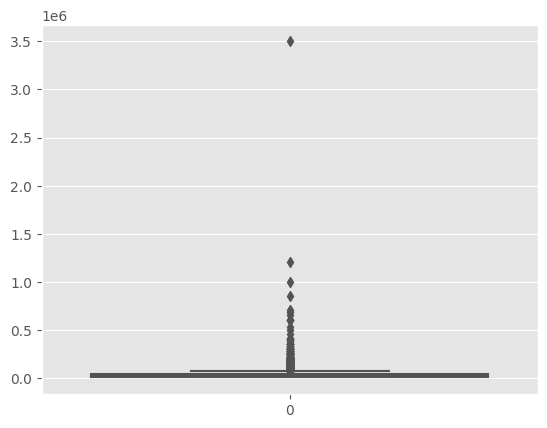

In [32]:
sns.boxplot(rent['Rent'])

In [33]:
rent['Rent'].skew()

21.409942283288803

In [34]:
rent['Rent'].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8\2924042165.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rent['Rent'])


<Axes: xlabel='Rent', ylabel='Density'>

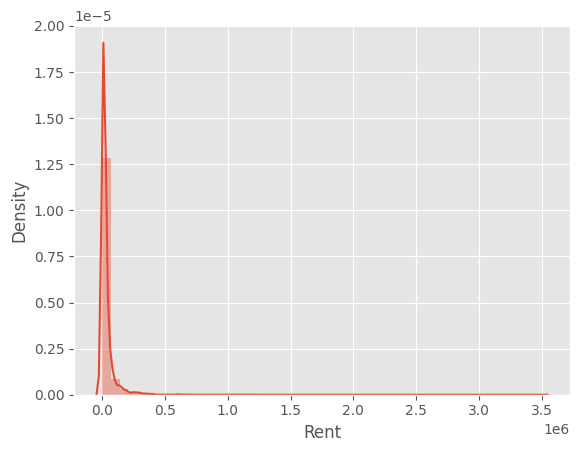

In [35]:
sns.distplot(rent['Rent'])

In [36]:
#finding percentile
upper_limit= new_rent['Rent'].quantile(0.95)
lower_limit= new_rent['Rent'].quantile(0.05)


In [37]:
upper_limit

120000.0

In [38]:
lower_limit

6000.0

In [39]:
new_rent= new_rent[(new_rent['Rent']<=120000.0) & (new_rent['Rent']>=6000.0 )]

In [40]:
new_rent.shape

(4272, 7)

In [41]:
new_rent.describe()

,BHK,Rent,Size,Bathroom
count,4272.000000,4272.000000,4272.000000,4272.000000
mean,2.040730,24291.215824,924.566948,1.898876
std,0.737482,21435.984297,515.752819,0.731970
min,1.000000,6000.000000,10.000000,1.000000
25%,2.000000,10000.000000,600.000000,1.000000
50%,2.000000,16000.000000,850.000000,2.000000
75%,3.000000,30000.000000,1200.000000,2.000000
max,4.000000,120000.000000,4105.000000,6.000000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8\1838196965.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_rent['Rent'])


<Axes: xlabel='Rent', ylabel='Density'>

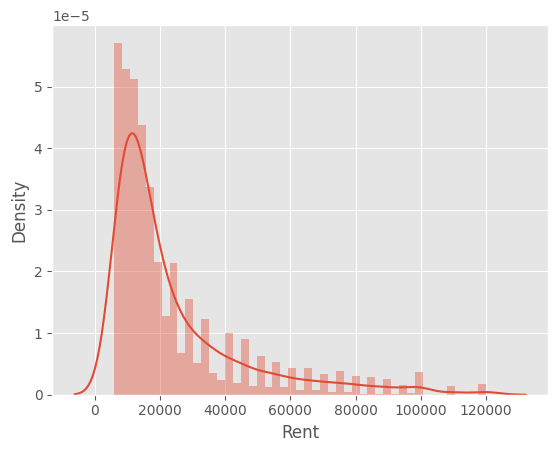

In [42]:
sns.distplot(new_rent['Rent'])

<Axes: >

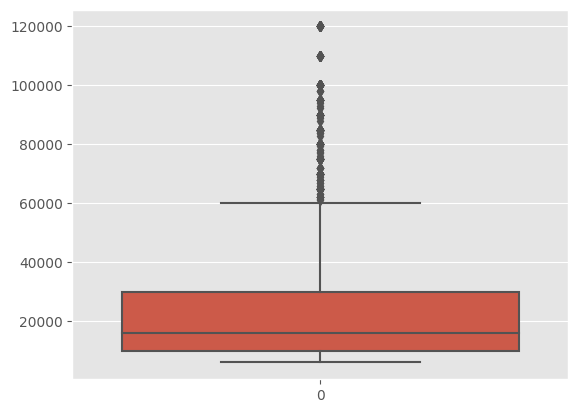

In [43]:
sns.boxplot(new_rent['Rent'])

In [44]:
rent["Size"].value_counts()

Size
1000    240
600     225
800     220
1200    193
500     192
       ... 
2770      1
1252      1
904       1
721       1
855       1
Name: count, Length: 615, dtype: int64

In [45]:
rent['Size'].unique()

array([1100,  800, 1000,  850,  600,  700,  250, 1200,  400,  375,  900,
       1286, 2000,  660,  650,  300, 1600,  355,  350,  550,  500,  630,
        270, 1500, 1300, 1068,  150,  450,  720,  680,  950, 1800,  480,
        435, 1450,  750,  220,   20,  200,  840,  740,  490,  751,  280,
        120, 1220,  670,  190,  240, 2200,  685,   44, 1110,  392,  710,
       1400,  160, 1250,  839,  230,  620, 1350,  723,  320, 2160, 1700,
        130,  505, 4000, 1190, 1012,  812,  420, 1750,  830, 1050,  960,
        756,  288,  986, 1330,  322, 3500,  957, 1430, 1320,  475,  780,
        570,  460,  530,  558,  175,  425,  721, 1150, 2210,  675, 1880,
        640, 1650,  518,  777, 2308,  890,  888,  275,  424, 2079,  586,
        610,  488,  722,  470,  410,  540,  932,  560, 3000,  696, 2500,
        715, 1337,  737,  760,  365, 2600, 1783,  565, 1514, 1080,  825,
        360, 1545,  432,  695, 1095,  790,  661,  330,  925, 1105, 1460,
        415,  585, 1755,  385,  628, 1064,  845, 19

<Axes: >

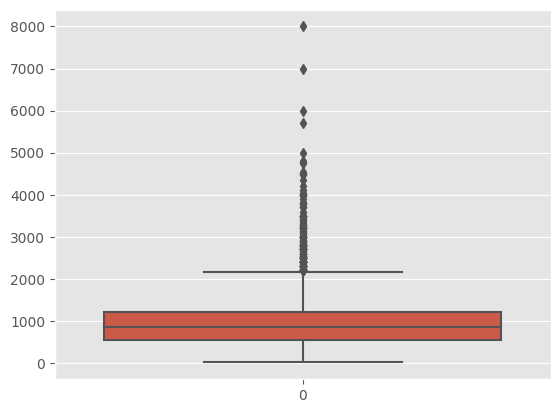

In [46]:
sns.boxplot(rent['Size'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8\647404979.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rent['Size'])


<Axes: xlabel='Size', ylabel='Density'>

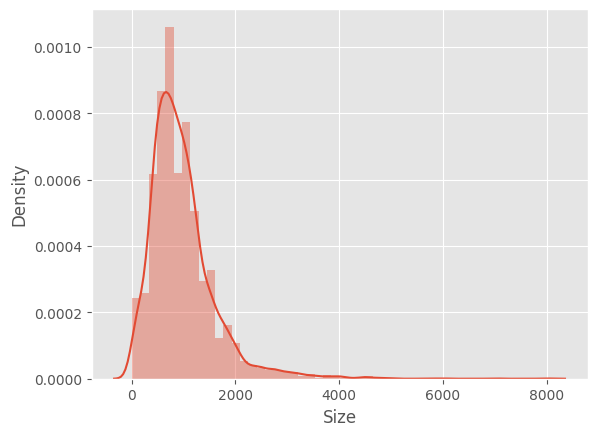

In [47]:
sns.distplot(rent['Size'])

In [48]:
#finding percentile
upper_limit_size= new_rent['Size'].quantile(0.90)
lower_limit_size= new_rent['Size'].quantile(0.10)


In [49]:
upper_limit_size

1600.0

In [50]:
lower_limit_size

400.0

In [51]:
new_rent =  new_rent[(new_rent['Size']<=1600.0) & (new_rent['Size']>=400.0)]

In [52]:
new_rent.shape

(3529, 7)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8\672173826.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_rent['Size'])


<Axes: xlabel='Size', ylabel='Density'>

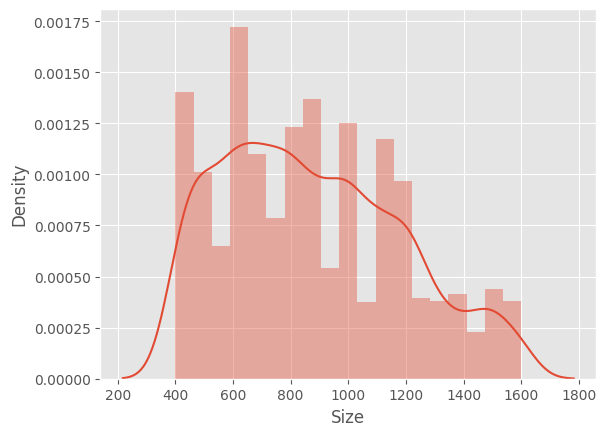

In [53]:
sns.distplot(new_rent['Size'])

<Axes: >

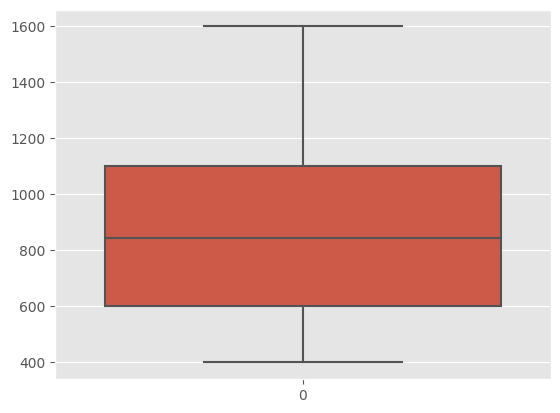

In [54]:
sns.boxplot(new_rent['Size'])

In [55]:
new_rent.head()

,BHK,Rent,Size,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Kolkata,Unfurnished,Bachelors,1


In [56]:
rent['Bathroom'].unique()

array([ 2,  1,  3,  5,  4,  6,  7, 10], dtype=int64)

In [57]:
rent['Bathroom'].value_counts()

Bathroom
2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: count, dtype: int64

<Axes: >

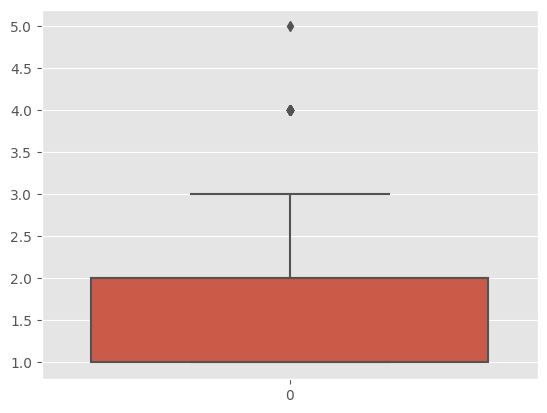

In [58]:
sns.boxplot(new_rent['Bathroom'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8\3821893916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_rent['Bathroom'])


<Axes: xlabel='Bathroom', ylabel='Density'>

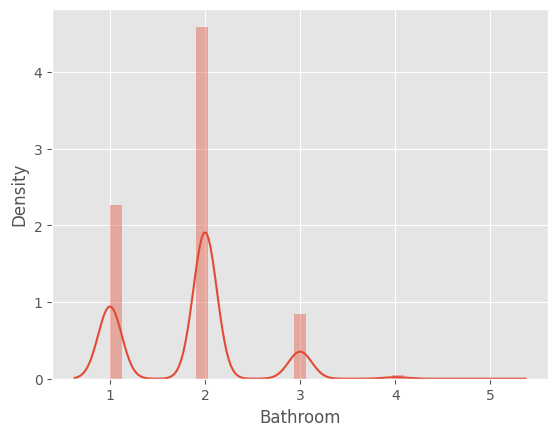

In [59]:
sns.distplot(new_rent['Bathroom'])

In [60]:
rent['Bathroom'].skew()

1.272951426254645

In [61]:
#finding percentile
upper_limit_bath= new_rent['Bathroom'].quantile(0.99)
lower_limit_bath= new_rent['Bathroom'].quantile(0.01)

In [62]:
upper_limit_bath

3.0

In [63]:
lower_limit_bath

1.0

In [64]:
new_rent =  new_rent[(new_rent['Bathroom']<=3.0) & (new_rent['Bathroom']>=1.0)]

In [65]:
new_rent.shape

(3506, 7)

<Axes: >

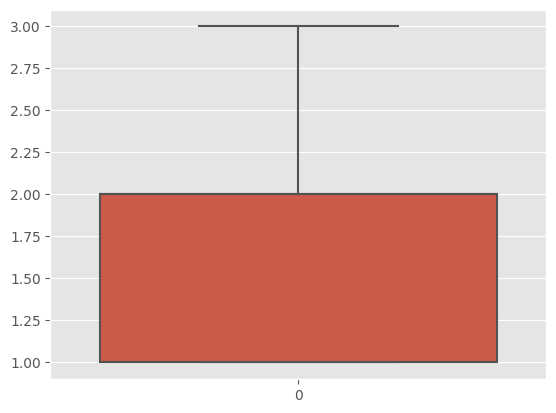

In [66]:
sns.boxplot(new_rent['Bathroom'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8\3821893916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_rent['Bathroom'])


<Axes: xlabel='Bathroom', ylabel='Density'>

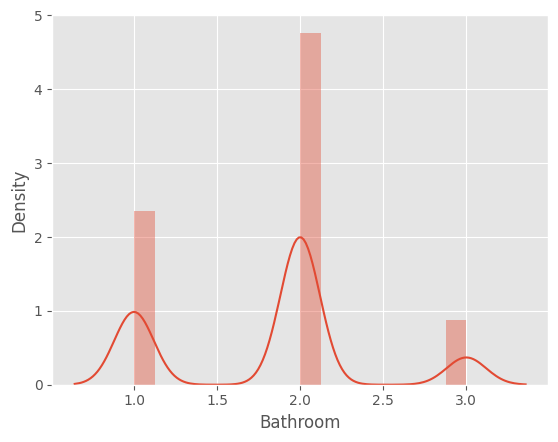

In [67]:
sns.distplot(new_rent['Bathroom'])

In [68]:
new_rent = new_rent.drop_duplicates()

In [69]:
new_rent = new_rent.reset_index(drop=True)

In [70]:
new_rent.shape

(3204, 7)

In [71]:
new_rent.head()

,BHK,Rent,Size,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Kolkata,Unfurnished,Bachelors,1



# Data Analysis

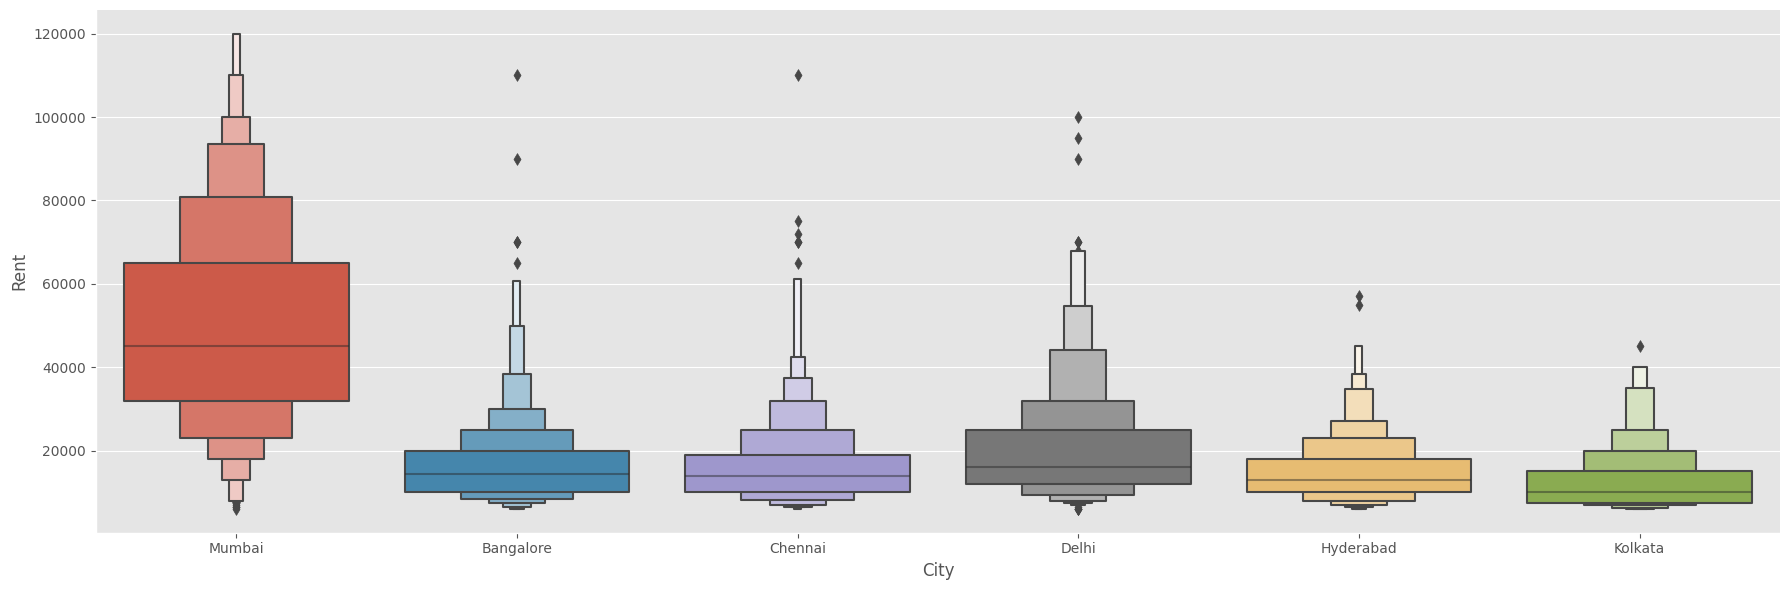

In [72]:
sns.catplot(y="Rent" , x="City" , data = new_rent.sort_values("Rent", ascending = False),kind = "boxen" , height = 6,aspect=3)

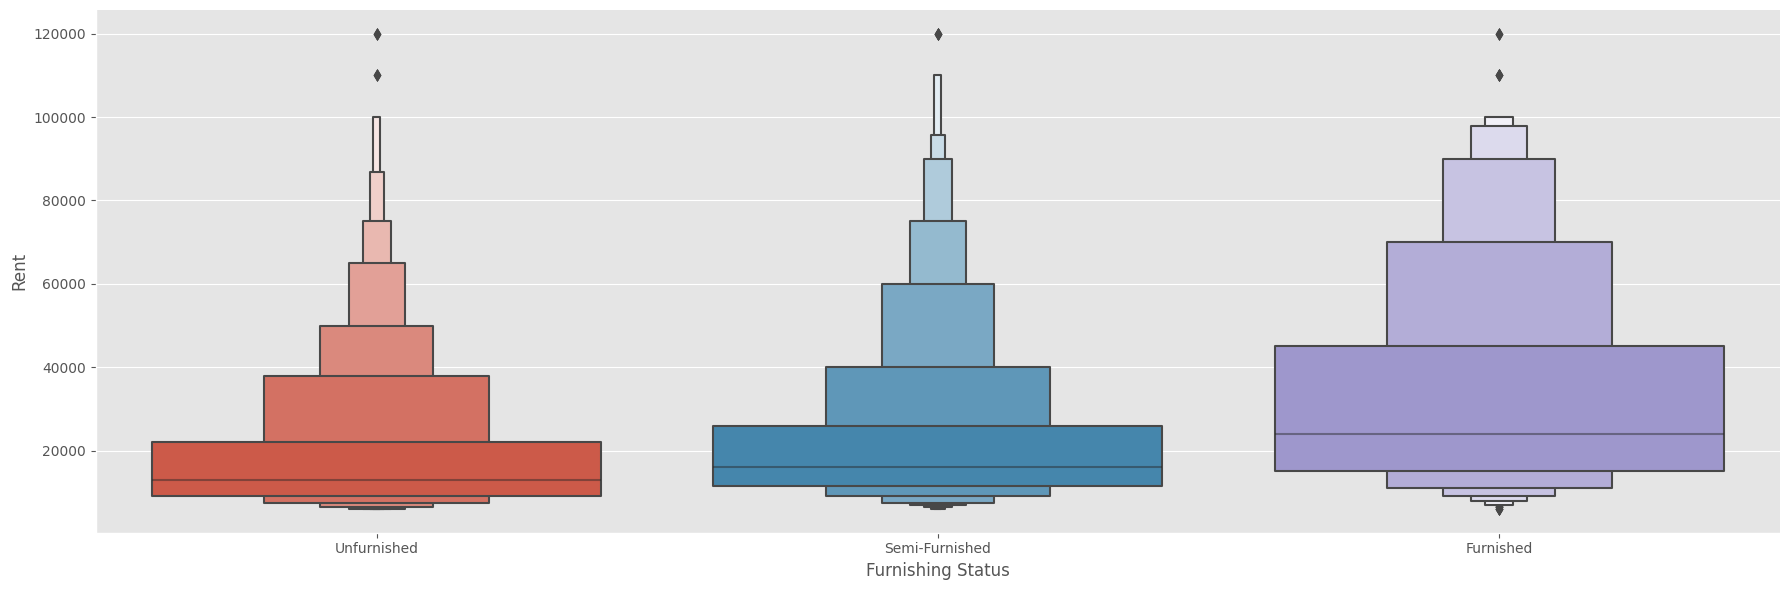

In [73]:
sns.catplot(y="Rent" , x="Furnishing Status" , data = new_rent.sort_values("Furnishing Status", ascending = False),kind = "boxen" , height = 6,aspect=3)

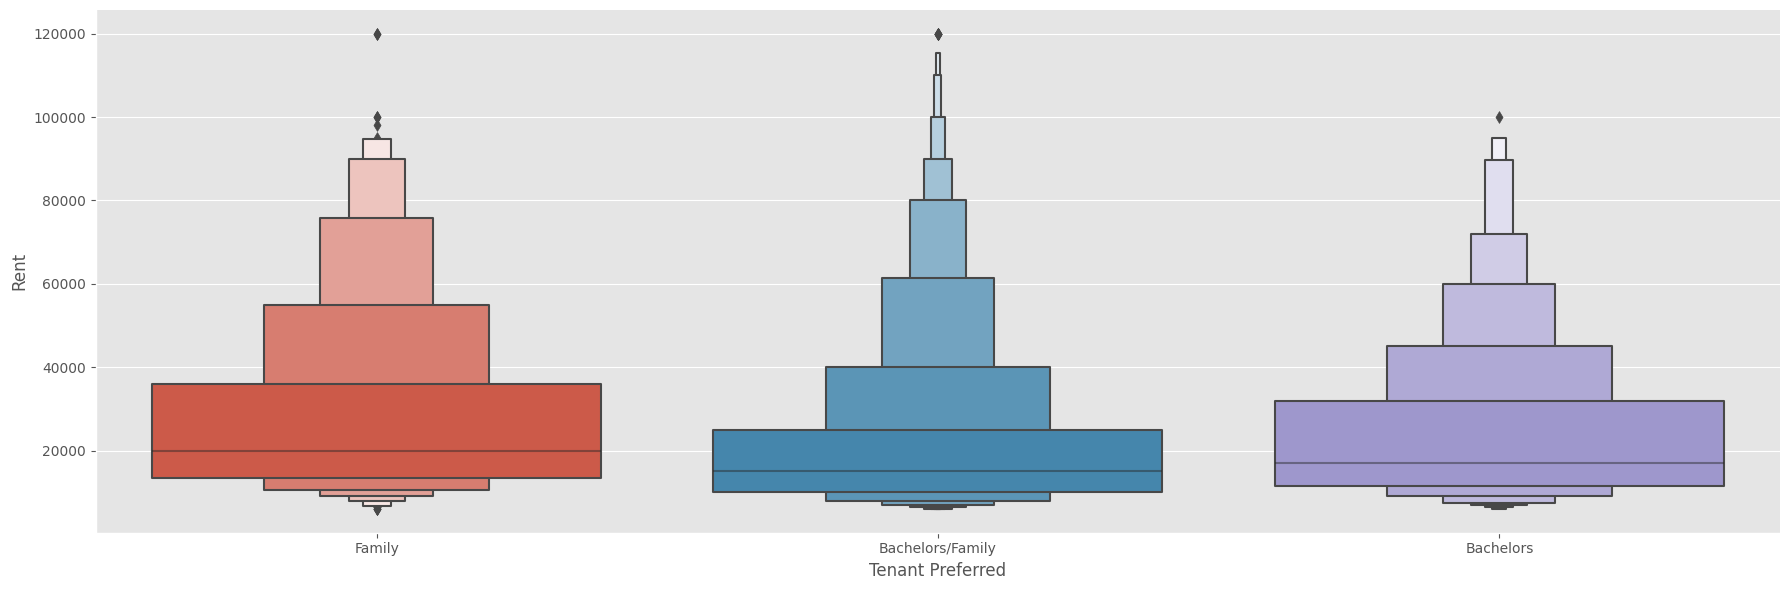

In [74]:
sns.catplot(y="Rent" , x="Tenant Preferred" , data = new_rent.sort_values("Tenant Preferred", ascending = False),kind = "boxen" , height = 6,aspect=3)

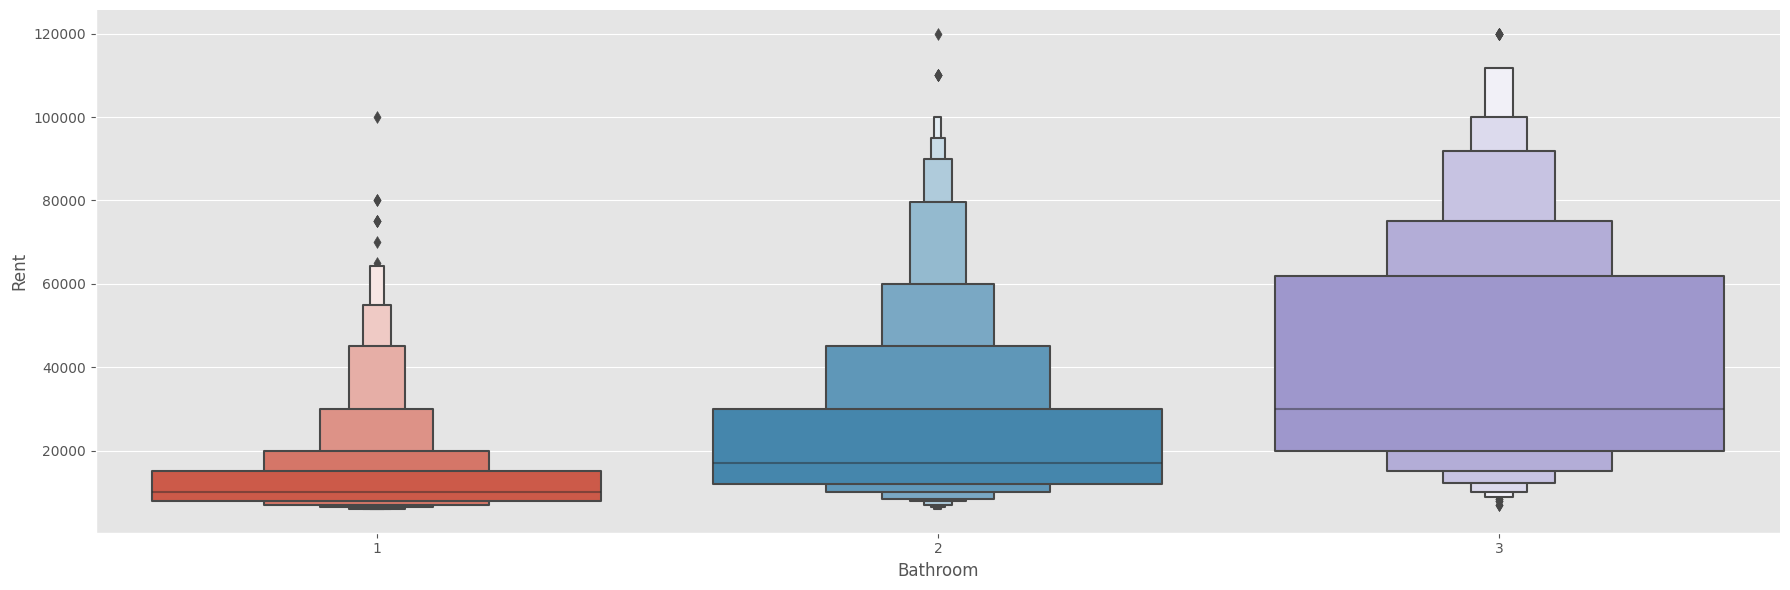

In [75]:
sns.catplot(y="Rent" , x="Bathroom" , data = new_rent.sort_values("Bathroom", ascending = False),kind = "boxen" , height = 6,aspect=3)

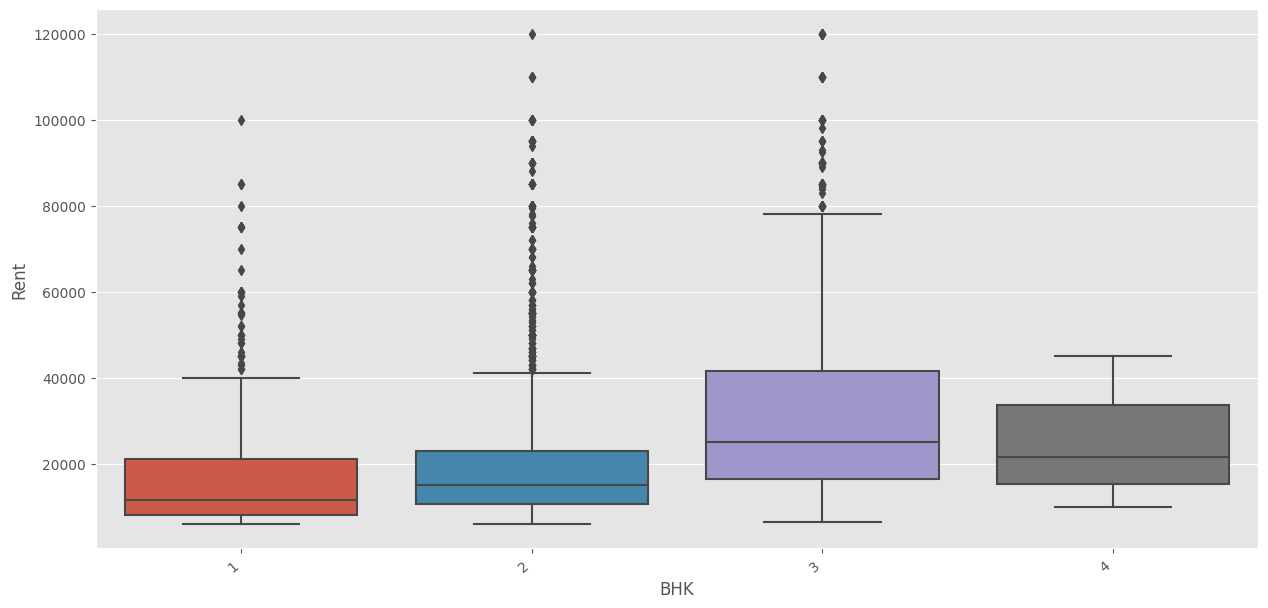

In [76]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='BHK',y='Rent',data=new_rent)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 82.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\AppData\

C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\AppData\

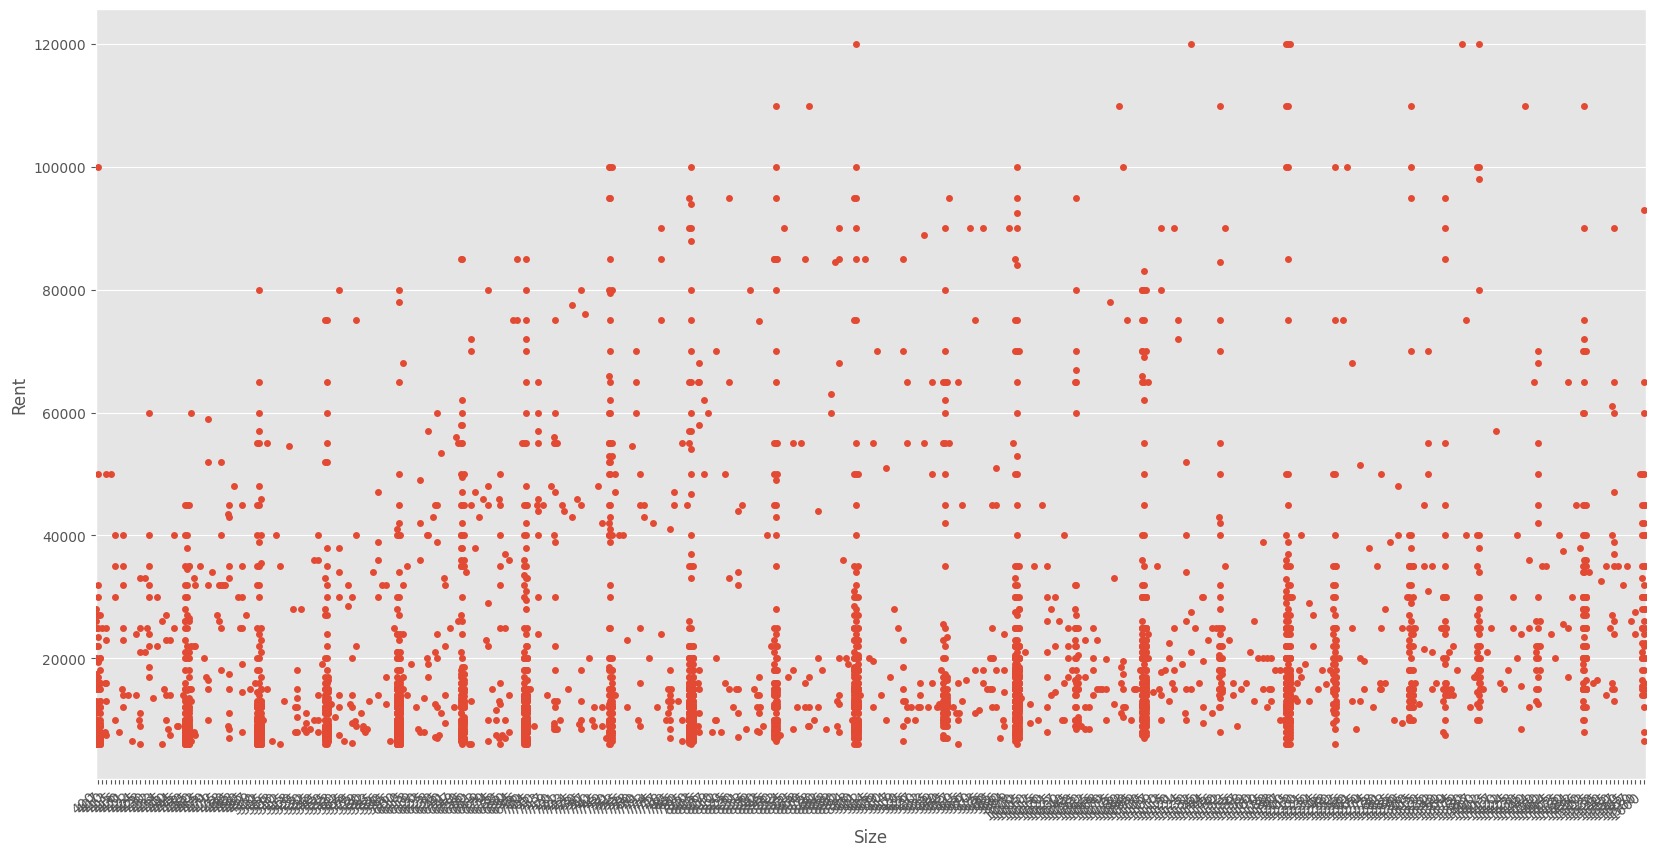

In [77]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Size',y='Rent',data=new_rent)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

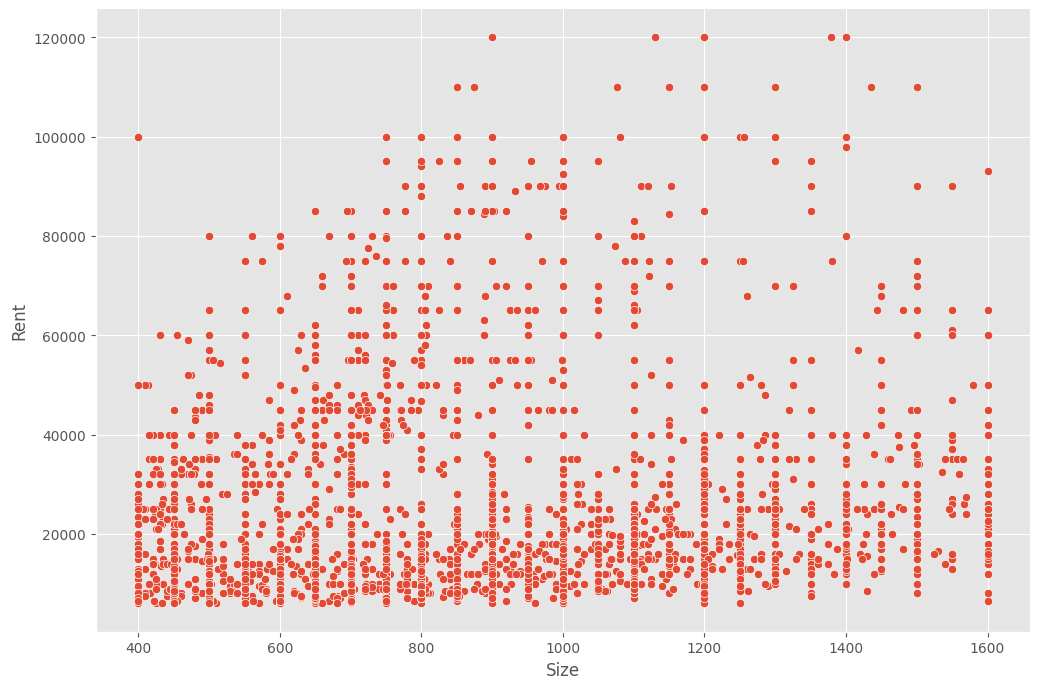

In [78]:
sns.relplot(x='Size',y='Rent',data=new_rent,height=7,aspect=1.5)

array([[<Axes: title={'center': 'BHK'}>,
        <Axes: title={'center': 'Rent'}>],
       [<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Bathroom'}>]], dtype=object)

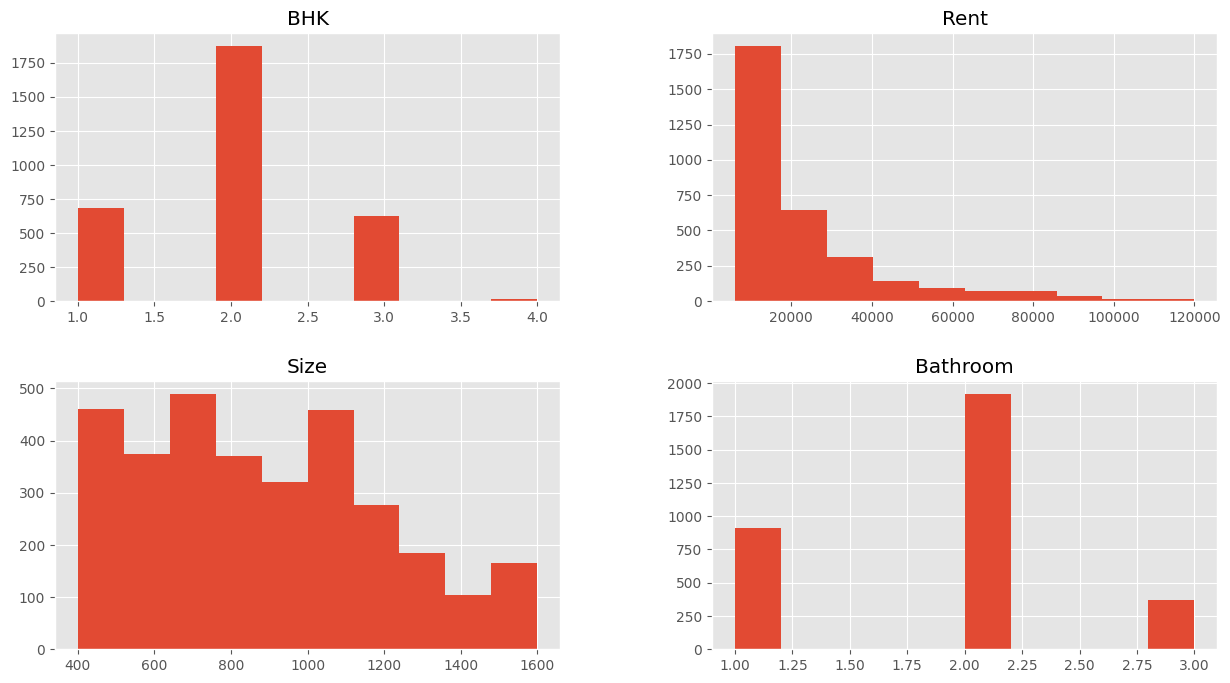

In [79]:
new_rent.hist(figsize=(15,8))

In [80]:
new_rent.to_csv("clean22houselast.csv")

# Training Data

In [81]:
X=new_rent.drop(columns = ['Rent'],axis=1)
y=new_rent['Rent']

In [82]:
X

,BHK,Size,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,1100,Kolkata,Unfurnished,Bachelors/Family,2
1,2,800,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,1000,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,800,Kolkata,Unfurnished,Bachelors/Family,1
4,2,850,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...
3199,3,1500,Hyderabad,Semi-Furnished,Family,3
3200,2,855,Hyderabad,Unfurnished,Bachelors,2
3201,2,1040,Hyderabad,Unfurnished,Bachelors,2
3202,2,1350,Hyderabad,Unfurnished,Bachelors/Family,2


In [83]:
y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
3199    15000
3200    17000
3201    25000
3202    12000
3203    45000
Name: Rent, Length: 3204, dtype: int64

# splitting data in training and testing 

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [85]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# One Hot Encoding

In [86]:
ohe=OneHotEncoder()
ohe.fit(X[['City','Furnishing Status','Tenant Preferred']])

OneHotEncoder()

In [87]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['City','Furnishing Status','Tenant Preferred']),
                                    remainder='passthrough')

In [88]:
#applying Linear Regression
lr=LinearRegression()

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()


In [91]:
pipe=make_pipeline(column_trans,scaler,lr)

In [92]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object),
                                                                            array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object),
                                                                            array(['Bachelors', 'Bachelors/Family', 'Family'], dtype=object)]),
                                                  ['City', 'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [93]:
y_pred=pipe.predict(X_test)

In [94]:
r2_score(y_test,y_pred)

0.6936151964389421

In [95]:
scores=[]
for i in range(4000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,scaler,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [96]:
np.argmax(scores)

766

In [97]:
scores[np.argmax(scores)]

0.7675253563566511

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,scaler,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7675253563566511

In [99]:
#Applying ridge regression
ridge = Ridge()

In [100]:
pipe = make_pipeline(column_trans , scaler , ridge)

In [101]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object),
                                                                            array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object),
                                                                            array(['Bachelors', 'Bachelors/Family', 'Family'], dtype=object)]),
                                                  ['City', 'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [102]:
y_pred_ridge=pipe.predict(X_test)

In [103]:
r2_score(y_test,y_pred_ridge)

0.7668179433396403

In [104]:
#applying lasso regrssion
lasso = Lasso()

In [105]:
pipe = make_pipeline(column_trans , scaler , lasso)

In [106]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object),
                                                                            array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object),
                                                                            array(['Bachelors', 'Bachelors/Family', 'Family'], dtype=object)]),
                                                  ['City', 'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [115]:
y_pred_lasso=pipe.predict(X_test)

In [116]:
r2_score(y_test,y_pred_lasso)

0.7668500266953866

In [107]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array([3,1700,'Hyderabad','Furnished','Family',3]).reshape(1,6)))

array([33778.5631148])

In [108]:
import pickle


In [109]:
pickle.dump(pipe,open('houserent1.pkl','wb'))

# Predicting Output

In [110]:
pipe.predict(pd.DataFrame(columns=['BHK','Size','City','Furnishing Status','Tenant Preferred','Bathroom'],data=np.array([2,600,'Kolkata','Unfurnished','Bachelors/Family',2]).reshape(1,6)))

array([7489.92033228])

In [111]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)